In [29]:
import matplotlib.pyplot as plt
from snaptools import plot_tools
import numpy as np
#import conversions as co
#import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import Grid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py
import matplotlib.gridspec as gridspec
from scipy import signal
import random
from astropy import units as u
from astropy import constants as const
#from astroML.time_series import lomb_scargle


from sklearn import preprocessing

%matplotlib inline
colors = ['#332288', '#CC6677', '#6699CC', '#117733']
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('lines', linewidth=3)

In [3]:
HernOffsets_cont = h5py.File('../Data/offSetsHern_continue.hdf5', 'r')
DehnenOffsets_cont = h5py.File('../Data/offSetsDehnen_continue.hdf5', 'r')

HernOffsets = h5py.File('../Data/offSetsHern_new.hdf5', 'r')
DehnenOffsets = h5py.File('../Data/offSetsDehnen_new.hdf5', 'r')


In [4]:
HernEllipses = h5py.File('../Data/ellipsesHern.hdf5', 'r')
DehnenEllipses = h5py.File('../Data/ellipsesDehnen.hdf5', 'r')

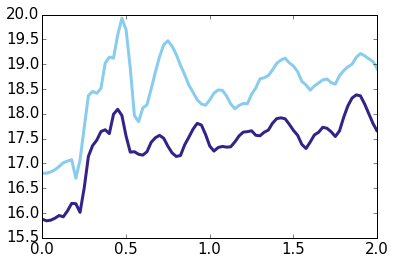

In [5]:
plt.plot(HernEllipses['45deg/main/time'][:], HernEllipses['45deg/main/majors'][:, 0])
plt.plot(DehnenEllipses['45deg/main/time'][:], DehnenEllipses['45deg/main/majors'][:, 0])

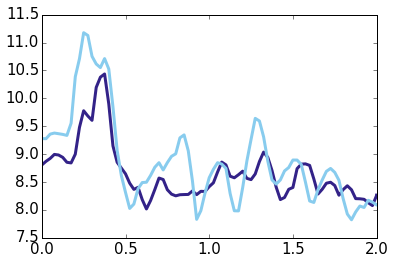

In [6]:
plt.plot(HernEllipses['45deg/main/time'][:], HernEllipses['45deg/main/majors'][:, 10])
plt.plot(DehnenEllipses['45deg/main/time'][:], DehnenEllipses['45deg/main/majors'][:, 10])

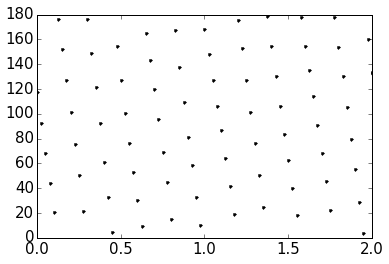

In [7]:
plt.plot(DehnenEllipses['45deg/main/time'][:], DehnenEllipses['45deg/main/angles'][:, -1], 'k.')

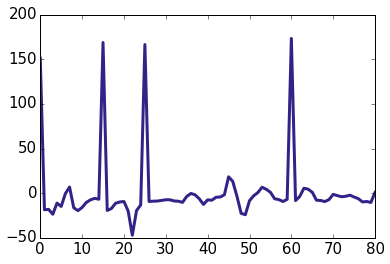

In [9]:
plt.plot(np.diff(DehnenEllipses['45deg/main/angles'][:, 0]))

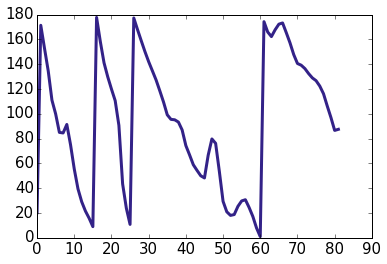

In [10]:
plt.plot(DehnenEllipses['45deg/main/angles'][:, 0])

In [5]:
R, sqrt_vc2_tot, sqrt_vc2_dm, sqrt_vc2_disk, sqrt_vc2_bulge = np.loadtxt('../Data/Dehnen_rotcurve.txt',
                                                                         unpack=True, skiprows=1)

(0, 20)

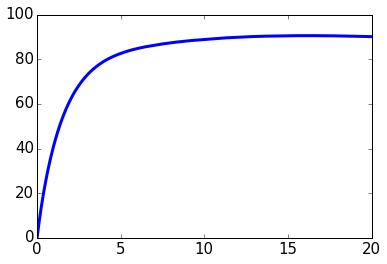

In [32]:
plt.plot(R, sqrt_vc2_tot)
plt.xlim([0, 20])

In [31]:

for i in xrange(20):
    major = DehnenEllipses['45deg/main/majors'][:, i]
    minor = DehnenEllipses['45deg/main/minors'][:, i]
    radii = (major + minor)/2.
    print "R = %3.2f +/- %3.2f kpc|" % (np.mean(radii), np.std(radii)),
    
    radius = np.mean(radii)
    
    vc = sqrt_vc2_tot[np.argmin(np.abs(R - radius))]
    print "Vc = %3.2f km/s|" % vc,  
    #Approximate rotation speed
    orb = (((2.0*np.pi*radius*u.kpc).to(u.km))/(vc*(u.km/u.s))).to(u.Gyr),
    
    print "Orb-P = %2.2f %s |" % (orb[0].value, orb[0].unit),
    
    frequency = np.diff(DehnenEllipses['45deg/main/time'][:][
                    np.where(np.diff(DehnenEllipses['45deg/main/angles'][:, i]) > 0)[0]])
    print np.mean(frequency), np.std(frequency)

R = 17.60 +/- 0.71 kpc| Vc = 90.50 km/s| Period = 1.20 Gyr | 0.142857 0.142812
R = 17.60 +/- 0.71 kpc| Vc = 90.50 km/s| Period = 1.20 Gyr | 0.142857 0.142812
R = 17.60 +/- 0.71 kpc| Vc = 90.50 km/s| Period = 1.20 Gyr | 0.142857 0.142812
R = 16.04 +/- 0.59 kpc| Vc = 90.57 km/s| Period = 1.09 Gyr | 0.116667 0.0869227
R = 16.04 +/- 0.59 kpc| Vc = 90.57 km/s| Period = 1.09 Gyr | 0.116667 0.0869227
R = 13.88 +/- 0.33 kpc| Vc = 90.37 km/s| Period = 0.94 Gyr | 0.114063 0.100378
R = 13.09 +/- 0.24 kpc| Vc = 90.21 km/s| Period = 0.89 Gyr | 0.153846 0.103704
R = 11.87 +/- 0.19 kpc| Vc = 89.82 km/s| Period = 0.81 Gyr | 0.165909 0.110409
R = 10.91 +/- 0.26 kpc| Vc = 89.40 km/s| Period = 0.75 Gyr | 0.166667 0.081862
R = 9.41 +/- 0.34 kpc| Vc = 88.52 km/s| Period = 0.65 Gyr | 0.136538 0.0907317
R = 8.00 +/- 0.34 kpc| Vc = 87.37 km/s| Period = 0.56 Gyr | 0.172727 0.0445362
R = 6.73 +/- 0.36 kpc| Vc = 85.93 km/s| Period = 0.48 Gyr | 0.170455 0.0449977
R = 5.53 +/- 0.36 kpc| Vc = 83.90 km/s| Period = 0

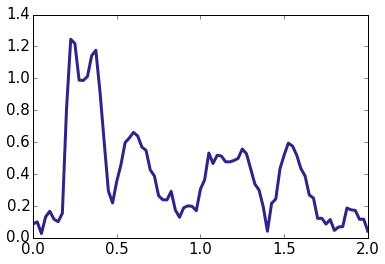

In [55]:
plt.plot(t, DehnenOffsets['stars/45deg/main/disk_dist'][:, 0])

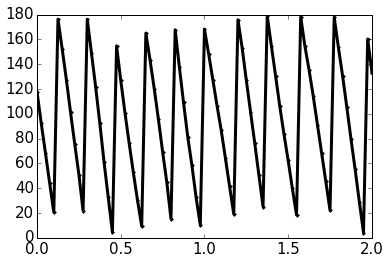

In [78]:
plt.plot(t, DehnenEllipses['45deg/main/angles'][:, -1], 'k.-')

0.296425


/usr/users/spardy/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide


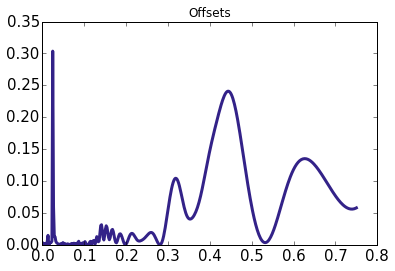

In [82]:
t = DehnenEllipses['45deg/main/time'][:]
mag = DehnenOffsets['stars/45deg/main/disk_dist'][:, 0]
#mag = DehnenEllipses['45deg/main/angles'][:, -1]
print mag.std()
periods = np.linspace(0., .75, 400)
ang_freqs = 2 * np.pi / periods
power = signal.lombscargle(t.astype('float'), (mag-mag.mean()).astype('float'), ang_freqs)

# normalize the power
N = len(t)
power *= 2 / (N * mag.std() ** 2)

plt.plot(periods, power)
plt.title('Offsets')

51.8561


/usr/users/spardy/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide


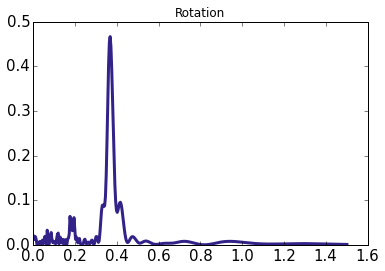

In [83]:
t = DehnenEllipses['45deg/main/time'][:]
#mag = DehnenOffsets['stars/45deg/main/disk_dist'][:, 0]
mag = DehnenEllipses['45deg/main/angles'][:, -1]
print mag.std()
periods = np.linspace(0., .75, 400)
ang_freqs = 2 * np.pi / periods
power = signal.lombscargle(t.astype('float'), (mag-mag.mean()).astype('float'), ang_freqs)

# normalize the power
N = len(t)
power *= 2 / (N * mag.std() ** 2)

plt.plot(periods*2, power)
plt.title('Rotation')

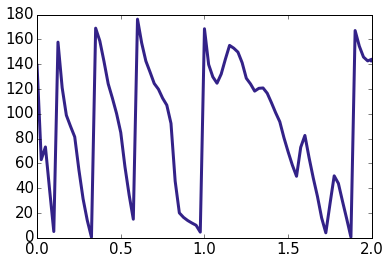

In [13]:
plt.plot(HernEllipses['45deg/main/time'][:], HernEllipses['45deg/main/angles'][:, 0])

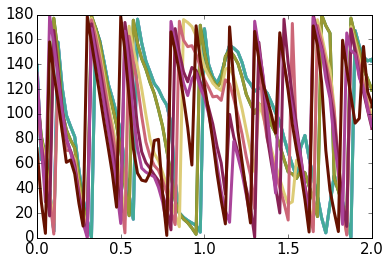

In [20]:
for i in xrange(10):
    plt.plot(HernEllipses['45deg/main/time'][:], HernEllipses['45deg/main/angles'][:, i])

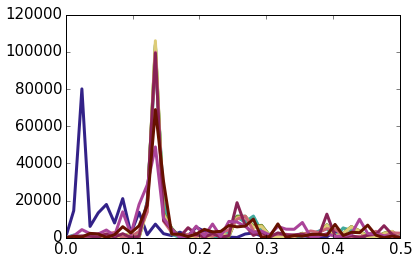

In [25]:
for i in xrange(10):
    f, Pxx_den= signal.periodogram(DehnenEllipses['45deg/main/angles'][:, -i])
    plt.plot(f, Pxx_den)

In [3]:
Modes = h5py.File('../Data/fouriermodesDehnen_disk.hdf5', 'r')


In [5]:
Starsgroups = ['/stars/45deg/main',
               '/stars/90deg/main',
               '/stars/0deg/main',
               '/stars/0deg_retro/main']

Gasgroups = ['/gas/45deg',
             '/gas/90deg',
             '/gas/inPlane',
             '/gas/retro']
names = [r'$\theta = 45$', r'$\theta = 90$',
         r'$\theta = 0$', r'$\theta = 0$ - Retrograde']

IC_times = DehnenOffsets['stars/IC']['time'][()][-20:]
IC_bar_offset = DehnenOffsets['stars/IC']['bar_offset'][()][-20:]
IC_bar_dist = DehnenOffsets['stars/IC']['bar_dist'][()][-20:]
IC_disk_dist = DehnenOffsets['stars/IC']['disk_dist'][()][-20:]

In [130]:
offsets = HernOffsets[Starsgroups[0]]['bar_offset'][()]

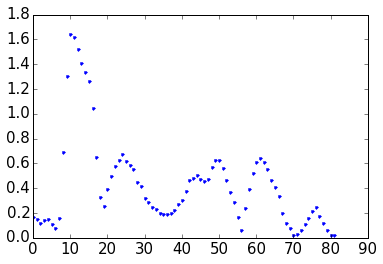

In [9]:
plt.plot(DehnenOffsets[Starsgroups[0]]['bar_offset'][:, 0], 'b.')

In [16]:
f, Pxx_den = signal.periodogram(DehnenOffsets[Starsgroups[0]]['bar_offset'][:, 0])

In [15]:
np.sort(Pxx_den)[::-1]

array([  4.88990881e-02,   2.76847035e-02,   1.97442118e-02,
         1.43846953e-02,   8.72031227e-03,   5.97851397e-03,
         5.00109931e-03,   4.15807357e-03,   1.55517587e-03,
         1.03341613e-03,   9.36985307e-04,   9.13462543e-04,
         6.59942045e-04,   5.21709560e-04,   5.14056184e-04,
         3.32296768e-04,   2.67749303e-04,   1.00804369e-04,
         8.62680536e-05,   3.45340122e-05,   3.34249853e-05,
         2.70548280e-05,   2.03078889e-05,   1.89789243e-05,
         1.60348100e-05,   1.41005212e-05,   1.33566282e-05,
         1.30065091e-05,   1.27670437e-05,   1.27154781e-05,
         1.23952614e-05,   7.52909727e-06,   7.31626551e-06,
         6.84462975e-06,   5.70433167e-06,   4.73784985e-06,
         2.62976050e-06,   1.92525545e-06,   1.55146404e-06,
         6.26502413e-07,   3.75167673e-07,   9.21518907e-16], dtype=float32)

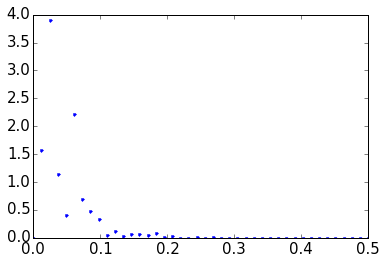

In [17]:
plt.plot(f, Pxx_den, 'b.')

In [88]:
np.array([[19.1181855248, 18.9372788602],
[19.2606384075, 18.7112768218],
[19.111113012, 16.7647262418],
[21.3556244213, 17.9961386073]]).mean(axis=1)/2

array([ 9.5138661 ,  9.49297881,  8.96895981,  9.83794076])

## Dehnen Models first

In [5]:
R, sqrt_vc2_tot, sqrt_vc2_dm, sqrt_vc2_disk, sqrt_vc2_bulge = np.loadtxt('../Data/Dehnen_rotcurve.txt', unpack=True, skiprows=1)
vc = sqrt_vc2_tot[np.argmin(np.abs(R - 10))]

In [90]:
#Approximate rotation speed
((2.0*np.pi*10.0*u.kpc)/(vc*(u.km/u.s))).to(u.Gyr)

<Quantity 0.6910400070965088 Gyr>

### 45 Deg

-1.125


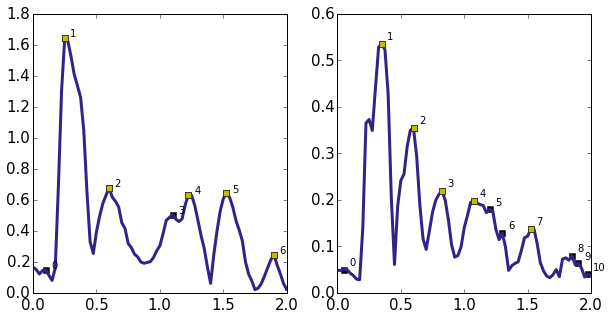

In [26]:
offsets = DehnenOffsets['/stars/45deg/main']['bar_offset'][:, 0]
time = DehnenOffsets['/stars/45deg/main']['time'][()]
m1 = Modes['/stars/45deg/main']['m1'][()]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax = axes[0]

window = 2
peak_45deg = np.ones_like(offsets[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_45deg *= (np.roll(offsets, i)[window:-window] < offsets[window:-window])
    
ax.plot(time[2:-2][peak_45deg], offsets[2:-2][peak_45deg], 'ks')
ax.plot(time, offsets)

for i in  xrange(np.sum(peak_45deg)):
    ax.text(time[2:-2][peak_45deg][i]+0.05, offsets[2:-2][peak_45deg][i]+0.01, str(i))

peak_45deg[np.where(peak_45deg)[0][[0, 3]]] = False

ax.plot(time[2:-2][peak_45deg], offsets[2:-2][peak_45deg], 'ys')

##########################

ax = axes[1]

peak_45deg_mode = np.ones_like(m1[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_45deg_mode *= (np.roll(m1, i)[window:-window] < m1[window:-window])

ax.plot(time[2:-2][peak_45deg_mode], m1[2:-2][peak_45deg_mode], 'ks')
ax.plot(time, m1)

for i in  xrange(np.sum(peak_45deg_mode)):
    ax.text(time[2:-2][peak_45deg_mode][i]+0.05, m1[2:-2][peak_45deg_mode][i]+0.01, str(i))

peak_45deg_mode[np.where(peak_45deg_mode)[0][[0, 5, 6, 8, 9, 10]]] = False

ax.plot(time[2:-2][peak_45deg_mode], m1[2:-2][peak_45deg_mode], 'ys')

print np.sum(time[2:-2][peak_45deg_mode] - time[2:-2][peak_45deg]) 

### 90 Deg

0.125


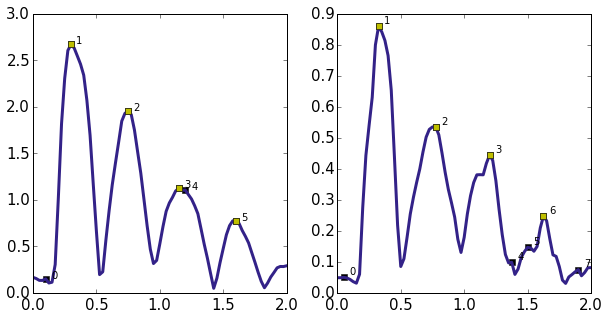

In [30]:
offsets = DehnenOffsets['/stars/90deg/main']['bar_offset'][:, 0]
time = DehnenOffsets['/stars/90deg/main']['time'][()]
m1 = Modes['/stars/90deg/main']['m1'][()]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]

window = 2
peak_90deg = np.ones_like(offsets[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_90deg *= (np.roll(offsets, i)[window:-window] < offsets[window:-window])

ax.plot(time[2:-2][peak_90deg], offsets[2:-2][peak_90deg], 'ks')
ax.plot(time, offsets)

for i in  xrange(np.sum(peak_90deg)):
    ax.text(time[2:-2][peak_90deg][i]+0.05, offsets[2:-2][peak_90deg][i]+0.01, str(i))

peak_90deg[np.where(peak_90deg)[0][[0, 4]]] = False

ax.plot(time[2:-2][peak_90deg], offsets[2:-2][peak_90deg], 'ys')

##########################

ax = axes[1]

peak_90deg_mode = np.ones_like(m1[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_90deg_mode *= (np.roll(m1, i)[window:-window] < m1[window:-window])

ax.plot(time[2:-2][peak_90deg_mode], m1[2:-2][peak_90deg_mode], 'ks')
ax.plot(time, m1)

for i in  xrange(np.sum(peak_90deg_mode)):
    ax.text(time[2:-2][peak_90deg_mode][i]+0.05, m1[2:-2][peak_90deg_mode][i]+0.01, str(i))

peak_90deg_mode[np.where(peak_90deg_mode)[0][[0, 4, 5, 7]]] = False

ax.plot(time[2:-2][peak_90deg_mode], m1[2:-2][peak_90deg_mode], 'ys')

print np.sum(time[2:-2][peak_90deg_mode] - time[2:-2][peak_90deg]) 

 ### 0 Deg

-0.0249999


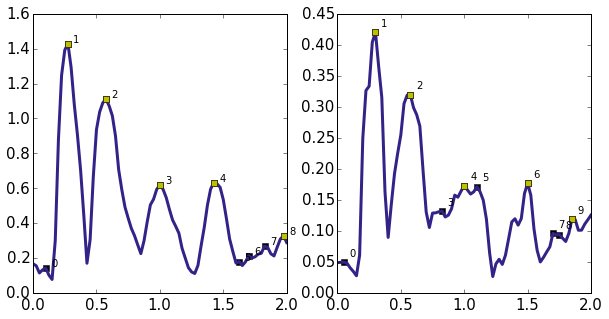

In [35]:
offsets = DehnenOffsets['/stars/0deg/main']['bar_offset'][:, 0]
time = DehnenOffsets['/stars/0deg/main']['time'][()]
m1 = Modes['/stars/0deg/main']['m1'][()]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]

window = 2
peak_0deg = np.ones_like(offsets[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_0deg *= (np.roll(offsets, i)[window:-window] < offsets[window:-window])

ax.plot(time[2:-2][peak_0deg], offsets[2:-2][peak_0deg], 'ks')
ax.plot(time, offsets)
for i in  xrange(np.sum(peak_0deg)):
    ax.text(time[2:-2][peak_0deg][i]+0.05, offsets[2:-2][peak_0deg][i]+0.01, str(i))

peak_0deg[np.where(peak_0deg)[0][[0, 5, 6, 7]]] = False

ax.plot(time[2:-2][peak_0deg], offsets[2:-2][peak_0deg], 'ys')

##########################

ax = axes[1]

peak_0deg_mode = np.ones_like(m1[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_0deg_mode *= (np.roll(m1, i)[window:-window] < m1[window:-window])

ax.plot(time[2:-2][peak_0deg_mode], m1[2:-2][peak_0deg_mode], 'ks')
ax.plot(time, m1)

for i in  xrange(np.sum(peak_0deg_mode)):
    ax.text(time[2:-2][peak_0deg_mode][i]+0.05, m1[2:-2][peak_0deg_mode][i]+0.01, str(i))

peak_0deg_mode[np.where(peak_0deg_mode)[0][[0, 3, 5, 7, 8]]] = False

ax.plot(time[2:-2][peak_0deg_mode], m1[2:-2][peak_0deg_mode], 'ys')

print np.sum(time[2:-2][peak_0deg_mode] - time[2:-2][peak_0deg]) 

### 0 Deg - retro

-0.075


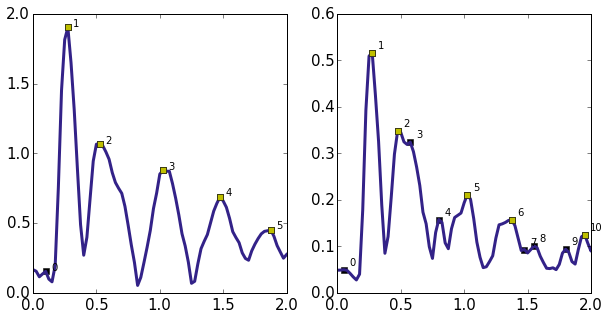

In [41]:
offsets = DehnenOffsets['/stars/0deg_retro/main']['bar_offset'][:, 0]
time = DehnenOffsets['/stars/0deg_retro/main']['time'][()]
m1 = Modes['/stars/0deg_retro/main']['m1'][()]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]

window = 2
peak_0deg_retro = np.ones_like(offsets[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_0deg_retro *= (np.roll(offsets, i)[window:-window] < offsets[window:-window])

ax.plot(time[2:-2][peak_0deg_retro], offsets[2:-2][peak_0deg_retro], 'ks')
ax.plot(time, offsets)

for i in  xrange(np.sum(peak_0deg_retro)):
    ax.text(time[2:-2][peak_0deg_retro][i]+0.05, offsets[2:-2][peak_0deg_retro][i]+0.01, str(i))

peak_0deg_retro[np.where(peak_0deg_retro)[0][[0]]] = False

ax.plot(time[2:-2][peak_0deg_retro], offsets[2:-2][peak_0deg_retro], 'ys')

##########################

ax = axes[1]

peak_0deg_retro_mode = np.ones_like(m1[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_0deg_retro_mode *= (np.roll(m1, i)[window:-window] < m1[window:-window])

ax.plot(time[2:-2][peak_0deg_retro_mode], m1[2:-2][peak_0deg_retro_mode], 'ks')
ax.plot(time, m1)

for i in  xrange(np.sum(peak_0deg_retro_mode)):
    ax.text(time[2:-2][peak_0deg_retro_mode][i]+0.05, m1[2:-2][peak_0deg_retro_mode][i]+0.01, str(i))

peak_0deg_retro_mode[np.where(peak_0deg_retro_mode)[0][[0, 3, 4, 7, 8, 8, 9]]] = False

ax.plot(time[2:-2][peak_0deg_retro_mode], m1[2:-2][peak_0deg_retro_mode], 'ys')

print np.sum(time[2:-2][peak_0deg_retro_mode] - time[2:-2][peak_0deg_retro]) 

## Hernquist Models

In [91]:
R, sqrt_vc2_tot, sqrt_vc2_dm, sqrt_vc2_disk, sqrt_vc2_bulge = np.loadtxt('../Data/Hern_rotcurve.txt', unpack=True, skiprows=1)
vc = sqrt_vc2_tot[np.argmin(np.abs(R - 10))]
#Approximate rotation speed
((2.0*np.pi*10.0*u.kpc)/(vc*(u.km/u.s))).to(u.Gyr)

<Quantity 0.6207970503073429 Gyr>

###45 Deg

0.413889 0.0782723
0.4
0.39


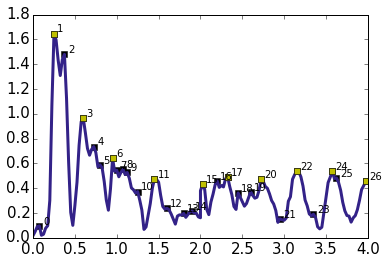

In [53]:
offsets = np.concatenate((HernOffsets['/stars/45deg/main']['bar_offset'][:, 0],
                          HernOffsets_cont['/stars/45deg/continue']['bar_offset'][:, 0]))
time = np.concatenate((HernOffsets['/stars/45deg/main']['time'][()],
                       HernOffsets_cont['/stars/45deg/continue']['time'][()]+2.))

window = 2
peak_45deg = np.ones_like(offsets[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_45deg *= (np.roll(offsets, i)[window:-window] < offsets[window:-window])

plt.plot(time[2:-2][peak_45deg], offsets[2:-2][peak_45deg], 'ks')
plt.plot(time, offsets)

for i in  xrange(np.sum(peak_45deg)):
    plt.text(time[2:-2][peak_45deg][i]+0.05, offsets[2:-2][peak_45deg][i]+0.01, str(i))


peak_45deg[np.where(peak_45deg)[0][[0, 2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 16, 18, 19, 21, 23, 25]]] = False

plt.plot(time[2:-2][peak_45deg], offsets[2:-2][peak_45deg], 'ys')

print np.diff(time[2:-2][peak_45deg]).mean(), np.std(np.diff(time[2:-2][peak_45deg]))
print np.diff(time[2:-2][peak_45deg][:4]).mean()
print np.diff(time[2:-2][peak_45deg][4:]).mean()

###90 Deg

0.352778 0.0582672
0.366667
0.37


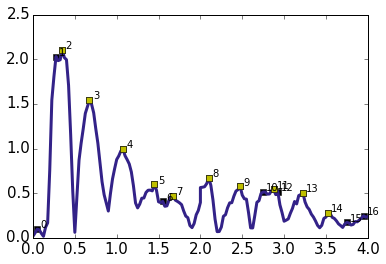

In [56]:
offsets = np.concatenate((HernOffsets['/stars/90deg/main']['bar_offset'][:, 0],
                          HernOffsets_cont['/stars/90deg/continue']['bar_offset'][:, 0]))
time = np.concatenate((HernOffsets['/stars/90deg/main']['time'][()],
                       HernOffsets_cont['/stars/90deg/continue']['time'][()]+2.))

window = 2
peak_90deg = np.ones_like(offsets[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_90deg *= (np.roll(offsets, i)[window:-window] < offsets[window:-window])

plt.plot(time[2:-2][peak_90deg], offsets[2:-2][peak_90deg], 'ks')
plt.plot(time, offsets)

for i in  xrange(np.sum(peak_90deg)):
    plt.text(time[2:-2][peak_90deg][i]+0.05, offsets[2:-2][peak_90deg][i]+0.01, str(i))

peak_90deg[np.where(peak_90deg)[0][[0, 1, 6, 10, 12, 15, 16]]] = False

plt.plot(time[2:-2][peak_90deg], offsets[2:-2][peak_90deg], 'ys')

print np.diff(time[2:-2][peak_90deg]).mean(), np.std(np.diff(time[2:-2][peak_90deg]))
print np.diff(time[2:-2][peak_90deg][:4]).mean()
print np.diff(time[2:-2][peak_90deg][4:]).mean()

###0 Deg

0.4 0.0707107


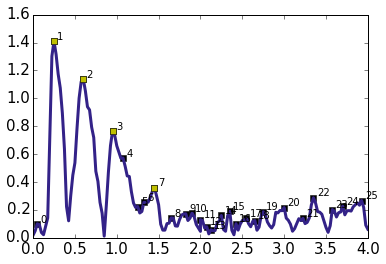

In [60]:
offsets = np.concatenate((HernOffsets['/stars/0deg/main']['bar_offset'][:, 0],
                          HernOffsets_cont['/stars/0deg/continue']['bar_offset'][:, 0]))
time = np.concatenate((HernOffsets['/stars/0deg/main']['time'][()],
                       HernOffsets_cont['/stars/0deg/continue']['time'][()]+2.))

window = 2
peak_0deg = np.ones_like(offsets[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_0deg *= (np.roll(offsets, i)[window:-window] < offsets[window:-window])

plt.plot(time[2:-2][peak_0deg], offsets[2:-2][peak_0deg], 'ks')
plt.plot(time, offsets)

for i in  xrange(np.sum(peak_0deg)):
    plt.text(time[2:-2][peak_0deg][i]+0.05, offsets[2:-2][peak_0deg][i]+0.01, str(i))

peak_0deg[np.where(peak_0deg)[0][[0, 4, 5, 6, 8,  9, 10]]] = False
peak_0deg[np.where(peak_0deg)[0][4:]] = False

plt.plot(time[2:-2][peak_0deg], offsets[2:-2][peak_0deg], 'ys')

print np.diff(time[2:-2][peak_0deg]).mean(), np.std(np.diff(time[2:-2][peak_0deg]))

###0 Deg - retro

0.37 0.0998749
0.366667
0.3625


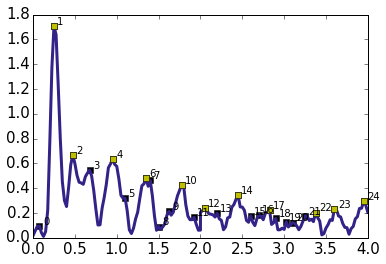

In [65]:
offsets = np.concatenate((HernOffsets['/stars/0deg_retro/main']['bar_offset'][:, 0],
                          HernOffsets_cont['/stars/0deg_retro/continue']['bar_offset'][:, 0]))
time = np.concatenate((HernOffsets['/stars/0deg_retro/main']['time'][()],
                       HernOffsets_cont['/stars/0deg_retro/continue']['time'][()]+2.))

window = 2
peak_0deg_retro = np.ones_like(offsets[window:-window]).astype('bool')
for i in np.arange(-window, window):
    if i == 0:
        continue
    peak_0deg_retro *= (np.roll(offsets, i)[window:-window] < offsets[window:-window])

plt.plot(time[2:-2][peak_0deg_retro], offsets[2:-2][peak_0deg_retro], 'ks')
plt.plot(time, offsets)

for i in  xrange(np.sum(peak_0deg_retro)):
    plt.text(time[2:-2][peak_0deg_retro][i]+0.05, offsets[2:-2][peak_0deg_retro][i]+0.01, str(i))

peak_0deg_retro[np.where(peak_0deg_retro)[0][[0, 3, 5, 7, 8, 9, 11, 13, 15, 16, 18, 19, 20, 21]]] = False

plt.plot(time[2:-2][peak_0deg_retro], offsets[2:-2][peak_0deg_retro], 'ys')

print np.diff(time[2:-2][peak_0deg_retro]).mean(), np.std(np.diff(time[2:-2][peak_0deg_retro]))
print np.diff(time[2:-2][peak_0deg_retro][:4]).mean()
print np.diff(time[2:-2][peak_0deg_retro][4:]).mean()